In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Data/train.csv")
df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [3]:
# find the set of year
df['year'].unique()

array([2019, 2020, 2021])

In [4]:
# check the value of week_no to ensure their starting count no. is 0
[df.loc[df['year'] == 2019, 'week_no'],
df.loc[df['year'] == 2020, 'week_no'],
df.loc[df['year'] == 2021, 'week_no']]

[0         0
 1         1
 2         2
 3         3
 4         4
          ..
 78912    48
 78913    49
 78914    50
 78915    51
 78916    52
 Name: week_no, Length: 26341, dtype: int64,
 53        0
 54        1
 55        2
 56        3
 57        4
          ..
 78965    48
 78966    49
 78967    50
 78968    51
 78969    52
 Name: week_no, Length: 26341, dtype: int64,
 106       0
 107       1
 108       2
 109       3
 110       4
          ..
 79018    48
 79019    49
 79020    50
 79021    51
 79022    52
 Name: week_no, Length: 26341, dtype: int64]

In [5]:
# combine year and week into a single one column
cut1 = df[df['year'] == 2019]['week_no'].max() + 1
cut2 = cut1 + df[df['year'] == 2020]['week_no'].max() + 1

df_week = df

df_week.loc[df_week['year'] == 2020, 'week_no'] += cut1
df_week.loc[df_week['year'] == 2021, 'week_no'] += cut2

# check if it is changed.
[df_week.loc[df_week['year'] == 2019, 'week_no'],
df_week.loc[df_week['year'] == 2020, 'week_no'],
df_week.loc[df_week['year'] == 2021, 'week_no']]

[0         0
 1         1
 2         2
 3         3
 4         4
          ..
 78912    48
 78913    49
 78914    50
 78915    51
 78916    52
 Name: week_no, Length: 26341, dtype: int64,
 53        53
 54        54
 55        55
 56        56
 57        57
         ... 
 78965    101
 78966    102
 78967    103
 78968    104
 78969    105
 Name: week_no, Length: 26341, dtype: int64,
 106      106
 107      107
 108      108
 109      109
 110      110
         ... 
 79018    154
 79019    155
 79020    156
 79021    157
 79022    158
 Name: week_no, Length: 26341, dtype: int64]

# start week of 2019 is week 0 
# start week of 2020 is week 53
# start week of 2021 is week 106

In [6]:
emission_avg_for_trend = df.groupby(['week_no'])['emission'].mean().reset_index()
emission_avg_for_trend

,week_no,emission
0,0,76.739149
1,1,82.376350
2,2,86.008823
3,3,87.903964
4,4,89.595095
...,...,...
154,154,83.616881
155,155,82.938555
156,156,82.788301
157,157,79.704971


<Axes: xlabel='week_no', ylabel='emission'>

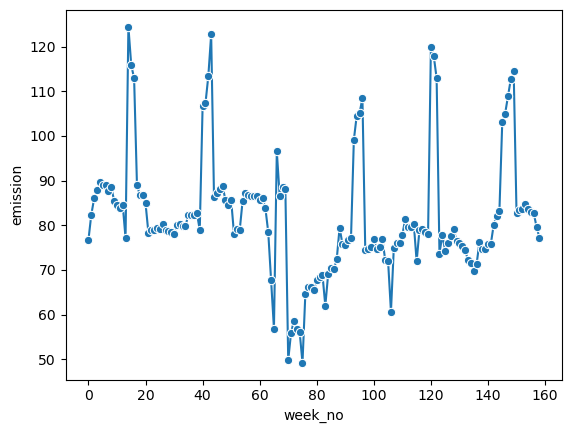

In [8]:
# Create the time series plot
sns.lineplot (data = emission_avg_for_trend, x = "week_no", y = "emission", marker = 'o')

# Overall, it shows Seasonal Patterns and a shrinkage at the first few weeks in 2020